In [10]:
data

,Ballot ID,County,Candidate
0,1323913,Jefferson,Charles Casper Stockham
1,1005842,Jefferson,Charles Casper Stockham
2,1880345,Jefferson,Charles Casper Stockham
3,1600337,Jefferson,Charles Casper Stockham
4,1835994,Jefferson,Charles Casper Stockham
...,...,...,...
369706,4714953,Arapahoe,Raymon Anthony Doane
369707,4497542,Arapahoe,Raymon Anthony Doane
369708,4085849,Arapahoe,Raymon Anthony Doane
369709,4592018,Arapahoe,Raymon Anthony Doane


In [12]:
import pandas as pd

data = pd.read_csv('/content/election_results.csv')

# Remove duplicates based on all columns
data_no_duplicates = data.drop_duplicates()

# Print the DataFrame without duplicates
print("DataFrame without duplicates:")
print(data_no_duplicates)


DataFrame without duplicates:
        Ballot ID     County                Candidate
0         1323913  Jefferson  Charles Casper Stockham
1         1005842  Jefferson  Charles Casper Stockham
2         1880345  Jefferson  Charles Casper Stockham
3         1600337  Jefferson  Charles Casper Stockham
4         1835994  Jefferson  Charles Casper Stockham
...           ...        ...                      ...
369706    4714953   Arapahoe     Raymon Anthony Doane
369707    4497542   Arapahoe     Raymon Anthony Doane
369708    4085849   Arapahoe     Raymon Anthony Doane
369709    4592018   Arapahoe     Raymon Anthony Doane
369710    4660518   Arapahoe     Raymon Anthony Doane

[369711 rows x 3 columns]


In [13]:
import numpy as np

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values by columns:\n", missing_values)

# Removing rows with missing values
data_cleaned = data.dropna()

# Filling missing values with a constant
data_filled_constant = data.fillna(value=0)

# Filling missing values with the mean of the column
data_filled_mean = data.fillna(data.mean(numeric_only=True))

# Filling missing values with the median of the column
data_filled_median = data.fillna(data.median(numeric_only=True))

# Filling missing values with the mode of the column
data_filled_mode = data.fillna(data.mode().iloc[0])

# Using forward-fill method to fill missing values
data_filled_ffill = data.fillna(method='ffill')

# Using backward-fill method to fill missing values
data_filled_bfill = data.fillna(method='bfill')

# Interpolating missing values
data_filled_interpolate = data.interpolate()

# Choose the appropriate method to handle missing values based on your specific dataset and save it as 'data_preprocessed'
data_preprocessed = data_filled_mean

Missing values by columns:
 Ballot ID    0
County       0
Candidate    0
dtype: int64


In [14]:
# Group the DataFrame by candidate names
grouped_candidates = data.groupby('Candidate')

# Iterate over the groups and perform operations if needed
for candidate, group in grouped_candidates:
    print(candidate)
    print(group)


Charles Casper Stockham
        Ballot ID     County                Candidate
0         1323913  Jefferson  Charles Casper Stockham
1         1005842  Jefferson  Charles Casper Stockham
2         1880345  Jefferson  Charles Casper Stockham
3         1600337  Jefferson  Charles Casper Stockham
4         1835994  Jefferson  Charles Casper Stockham
...           ...        ...                      ...
353207    4142285   Arapahoe  Charles Casper Stockham
353208    4727490   Arapahoe  Charles Casper Stockham
353209    4692135   Arapahoe  Charles Casper Stockham
353210    4143236   Arapahoe  Charles Casper Stockham
353211    4827189   Arapahoe  Charles Casper Stockham

[85213 rows x 3 columns]
Diana DeGette
        Ballot ID     County      Candidate
19723     1168600  Jefferson  Diana DeGette
19724     1535125  Jefferson  Diana DeGette
19725     1962715  Jefferson  Diana DeGette
19726     1327788  Jefferson  Diana DeGette
19727     1588618  Jefferson  Diana DeGette
...           ...       

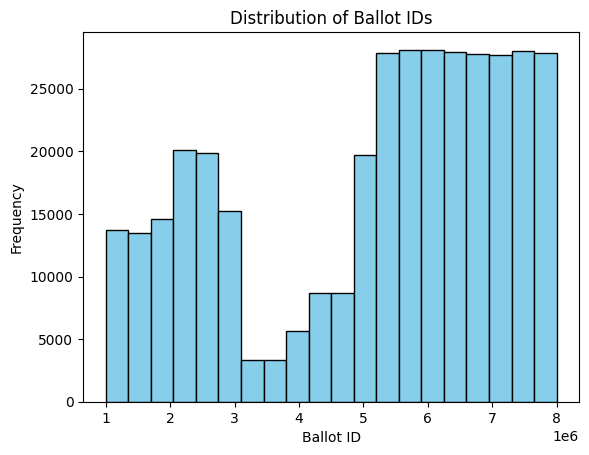

In [15]:
import matplotlib.pyplot as plt

plt.hist(data['Ballot ID'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ballot ID')
plt.ylabel('Frequency')
plt.title('Distribution of Ballot IDs')
plt.show()


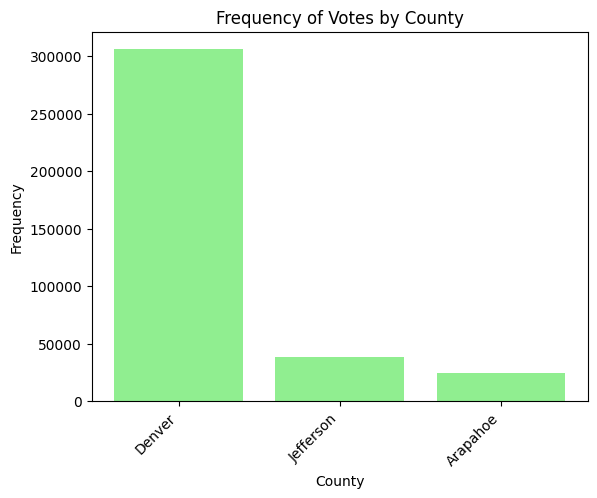

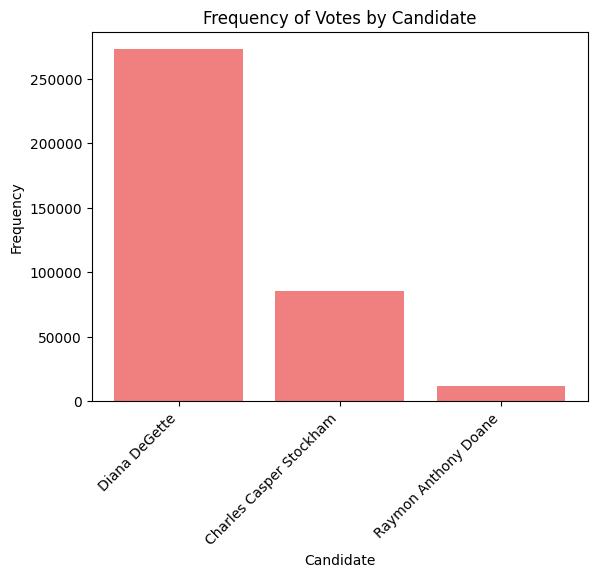

In [16]:
# Bar chart for County
county_counts = data['County'].value_counts()
plt.bar(county_counts.index, county_counts.values, color='lightgreen')
plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Frequency of Votes by County')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for Candidate
candidate_counts = data['Candidate'].value_counts()
plt.bar(candidate_counts.index, candidate_counts.values, color='lightcoral')
plt.xlabel('Candidate')
plt.ylabel('Frequency')
plt.title('Frequency of Votes by Candidate')
plt.xticks(rotation=45, ha='right')
plt.show()


In [17]:
import csv
import os

file_to_load = os.path.join("/content/election_results.csv")
file_to_save = os.path.join("/content/election_analysis.txt")

# Initialize a total vote counter.
total_votes = 0

# Candidate Options and candidate votes.
candidate_options = []
candidate_votes = {}

# Create a county list and county votes dictionary.
county_list = []
county_votes = {}

# Track the winning candidate, vote count and percentage
winning_candidate = ""
winning_count = 0
winning_percentage = 0

# Track the largest county and county voter turnout.
largest_county_turnout = ""
largest_county_turnout_count = 0
largest_county_percentage = 0

# Read the csv and convert it into a list of dictionaries
with open(file_to_load) as election_data:
    # Read the file object with the reader function.
    reader = csv.reader(election_data)

    # Read the header
    header = next(reader)

    # For each row in the CSV file.
    for row in reader:

        # Add to the total vote count
        total_votes += 1

        # Get the candidate name from each row.
        candidate_name = row[2]

        # Extract the county name from each row.
        county_name = row[1]

        # If the candidate does not match any existing candidate add it to
        # the candidate list
        if candidate_name not in candidate_options:

            # Add the candidate name to the candidate list.
            candidate_options.append(candidate_name)

            # And begin tracking that candidate's voter count.
            candidate_votes[candidate_name] = 0

        # Add a vote to that candidate's count
        candidate_votes[candidate_name] += 1

        # Write a decision statement that checks that the
        # county does not match any existing county in the county list.
        if county_name not in county_list:

            # Add the existing county to the list of counties.
            county_list.append(county_name)

            # Begin tracking the county's vote count.
            county_votes[county_name] = 0

        # Add a vote to that county's vote count.
        county_votes[county_name] += 1


# Save the results to our text file.
with open(file_to_save, "w") as txt_file:

    # Print the final vote count (to terminal)
    election_results = (
        f"\nElection Results\n"
        f"-------------------------\n"
        f"Total Votes: {total_votes:,}\n"
        f"-------------------------\n\n"
        f"County Votes:\n"
    )
    print(election_results, end="")

    # Save the final vote count to the text file.
    txt_file.write(election_results)

    # Write a repetition statement to get the county from the county dictionary.
    for county in county_list:

        # Initialize a variable to hold the county’s votes as they are retrieved from the county votes dictionary.
        county_vote = county_votes.get(county)

        # Calculate the percent of total votes for the county.
        county_vote_percentage = float(county_vote) / float(total_votes) * 100

        # Print the county results to the terminal.
        county_results = f"{county}: {county_vote_percentage:.1f}% ({county_vote:,})\n"

        # Print the counties to test.
        print(county_results)

        # Save the county votes to a text file.
        txt_file.write(county_results)

        # Write a decision statement to determine the winning county and get its vote count.
        if (county_vote > largest_county_turnout_count) and (
            county_vote_percentage > largest_county_percentage
        ):
            # True
            largest_county_turnout_count = county_vote
            largest_county_percentage = county_vote_percentage
            largest_county_turnout = county

    # Print the county with the largest turnout to the terminal.
    winning_county_print = (
        f"-------------------------\n"
        f"Largest County Turnout: {largest_county_turnout}\n"
        f"-------------------------\n"
    )
    print(winning_county_print)

    # Save the county with the largest turnout to a text file.
    txt_file.write(winning_county_print)

    # Save the final candidate vote count to the text file.
    for candidate_name in candidate_votes:

        # Retrieve vote count and percentage
        votes = candidate_votes.get(candidate_name)
        vote_percentage = float(votes) / float(total_votes) * 100
        candidate_results = f"{candidate_name}: {vote_percentage:.1f}% ({votes:,})\n"

        # Print each candidate's voter count and percentage to the
        # terminal.
        print(candidate_results)
        #  Save the candidate results to our text file.
        txt_file.write(candidate_results)

        # Determine winning vote count, winning percentage, and candidate.
        if (votes > winning_count) and (vote_percentage > winning_percentage):
            winning_count = votes
            winning_candidate = candidate_name
            winning_percentage = vote_percentage

    # Print the winning candidate (to terminal)
    winning_candidate_summary = (
        f"-------------------------\n"
        f"Winner: {winning_candidate}\n"
        f"Winning Vote Count: {winning_count:,}\n"
        f"Winning Percentage: {winning_percentage:.1f}%\n"
        f"-------------------------\n"
    )
    print(winning_candidate_summary)

    # Save the winning candidate's name to the text file
    txt_file.write(winning_candidate_summary)



Election Results
-------------------------
Total Votes: 369,711
-------------------------

County Votes:
Jefferson: 10.5% (38,855)

Denver: 82.8% (306,055)

Arapahoe: 6.7% (24,801)

-------------------------
Largest County Turnout: Denver
-------------------------

Charles Casper Stockham: 23.0% (85,213)

Diana DeGette: 73.8% (272,892)

Raymon Anthony Doane: 3.1% (11,606)

-------------------------
Winner: Diana DeGette
Winning Vote Count: 272,892
Winning Percentage: 73.8%
-------------------------

